In [ ]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from tensorflow.image import grayscale_to_rgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir dataset
!cp -r '/content/gdrive/MyDrive/MEVIEW/data' '/content/dataset'

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/dataset/data/train",target_size=(256,256), shuffle=False)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/dataset/data/val", target_size=(256,256), shuffle=False)

Found 2103 images belonging to 6 classes.
Found 460 images belonging to 6 classes.


In [ ]:
## Loading model
from tensorflow.keras.applications import Xception, MobileNetV2, ResNet50, VGG19, EfficientNetB7

base_model = EfficientNetB7(weights="imagenet", include_top=False, input_shape=(256,256,3))
base_model.trainable = False ## Not trainable weights

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(6, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])
 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(from_logits=True)],
)

In [ ]:
model.summary()

In [ ]:

hist = model.fit(
        traindata,
        steps_per_epoch=traindata.samples//32,
        epochs=4,
        validation_data = testdata,
        validation_steps = testdata.samples//32,
)

Epoch 1/4
65/65 [==============================] - 129s 1s/step - loss: 2.0107 - accuracy: 0.4013 - precision: 0.4815 - recall: 0.3081 - auc: 0.7469 - val_loss: 0.8892 - val_accuracy: 0.6429 - val_precision: 0.7245 - val_recall: 0.6339 - val_auc: 0.9249
Epoch 2/4
65/65 [==============================] - 82s 1s/step - loss: 0.7339 - accuracy: 0.7784 - precision: 0.8691 - recall: 0.7151 - auc: 0.9419 - val_loss: 0.5274 - val_accuracy: 0.7746 - val_precision: 0.8136 - val_recall: 0.7210 - val_auc: 0.9720
Epoch 3/4
65/65 [==============================] - 82s 1s/step - loss: 0.3592 - accuracy: 0.8904 - precision: 0.9182 - recall: 0.8667 - auc: 0.9829 - val_loss: 0.1527 - val_accuracy: 0.9732 - val_precision: 0.9748 - val_recall: 0.9509 - val_auc: 0.9981
Epoch 4/4
65/65 [==============================] - 82s 1s/step - loss: 0.1324 - accuracy: 0.9860 - precision: 0.9889 - recall: 0.9850 - auc: 0.9955 - val_loss: 0.1287 - val_accuracy: 0.9665 - val_precision: 0.9665 - val_recall: 0.9665 - val

In [ ]:
y_pred = model.predict(testdata)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Anger', 'Contempt', 'Fear', 'Happiness', 'Neutral', 'Surprise']
cr = classification_report(testdata.classes, y_pred, target_names=target_names)
print(cr)

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        40
    Contempt       0.87      1.00      0.93       104
        Fear       1.00      1.00      1.00        65
   Happiness       1.00      0.86      0.93       108
     Neutral       1.00      1.00      1.00        23
    Surprise       1.00      1.00      1.00       120

    accuracy                           0.97       460
   macro avg       0.98      0.98      0.98       460
weighted avg       0.97      0.97      0.97       460



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix, jaccard_score
cm = confusion_matrix(testdata.labels, y_pred)
acc = accuracy_score(testdata.labels, y_pred, normalize=True)

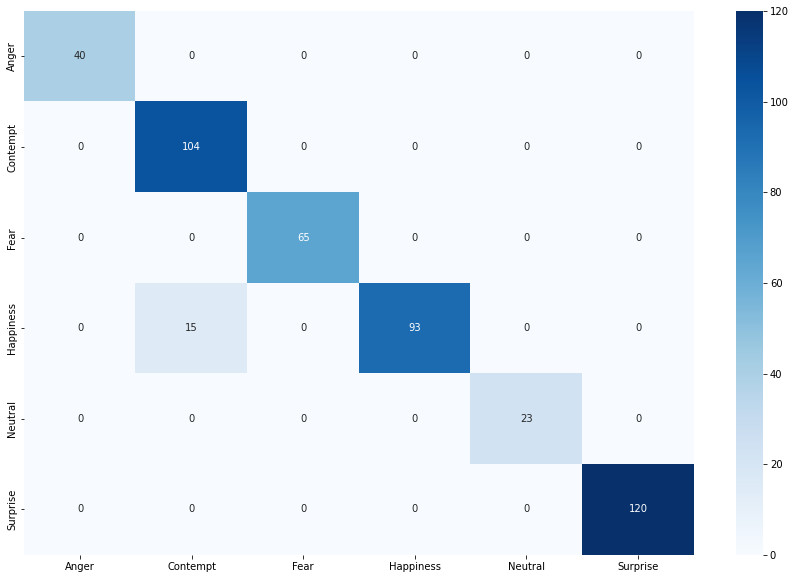

In [ ]:
import seaborn as sns

labels = ['Anger', 'Contempt', 'Fear', 'Happiness', 'Neutral', 'Surprise']
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True, cmap=plt.cm.Blues, fmt="d", xticklabels=labels, yticklabels=labels)
plt.show()

In [ ]:
model.evaluate(testdata, batch_size=32)

15/15 [==============================] - 15s 978ms/step - loss: 0.1254 - accuracy: 0.9674 - precision: 0.9674 - recall: 0.9674 - auc: 0.9977


[0.12535586953163147,
 0.967391312122345,
 0.967391312122345,
 0.967391312122345,
 0.9976937174797058]

[0. 0. 0. 0. 0. 1.]


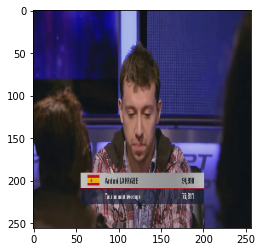

In [ ]:
data, label = next(testdata)
plt.imshow(data[2].astype('uint8'))
print(label[2])
